In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [55]:
df = pd.read_csv('Position_Salaries.csv')
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

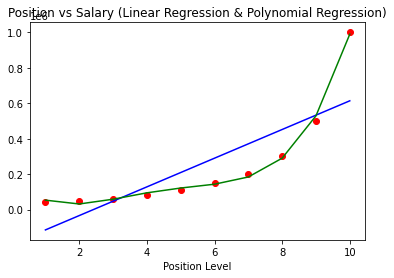

In [56]:
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) # Objek regresi p'al dengan derajat 4
x_poly = poly_reg.fit_transform(x)  # x_poly adalah matriks nx5 dengan kolom 1, x, x^2, x^3, x^4
lin_reg_2 = LinearRegression() 
lin_reg_2.fit(x_poly,y)

# Visualizing datapoints
plt.scatter(x,y,color='red')
plt.title('Position vs Salary (Linear Regression & Polynomial Regression)')

# Visualising the Linear Regression results
plt.plot(x,regressor.predict(x),color='blue')
plt.xlabel('Position Level')

# Visualising the Polynomial Regression results
plt.plot(x,lin_reg_2.predict(poly_reg.fit_transform(x)),color='green')
plt.xlabel('Position Level')

plt.show()


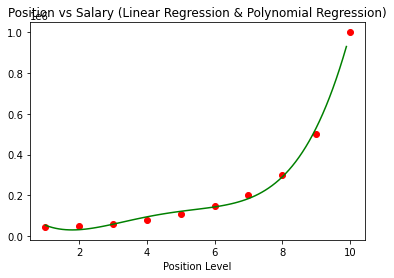

In [57]:
# Smoothening the curve
x_grid = np.arange(min(x),max(x),0.1) # membuat array dari min(x) sampai max(x) dengan interval 0.1 sehingga kurva lebih mulus
x_grid = x_grid.reshape(len(x_grid),1) # transpose x_grid
plt.scatter(x,y,color='red')
plt.title('Position vs Salary (Linear Regression & Polynomial Regression)')
plt.plot(x_grid,lin_reg_2.predict(poly_reg.fit_transform(x_grid)),color='green')
plt.xlabel('Position Level')
plt.show()


In [58]:
# getting coefficient and intercept
print(lin_reg_2.coef_)
print(lin_reg_2.intercept_)

[      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]
184166.66666727327


In [59]:
# predicting new value
print(lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))) # gunakan poly_reg.fit_transform karena x adalah suatu nilai dan dibutuhkan matriks 1x5

[158862.45265157]
